# Digital Health Publications and Clinical Trials Analysis Scripts
## For any questions, please contact the corresponding author of the publication
==============================================================================================

### Files needed to be placed in the datapath folder specified below include:
- Manually created file of all NIH publications per year.
    - filename labeled here as: allNih-publications-Summary.xlsx.  Ths is in the github folder.
    - this was created using the iSearch Publications Module Facets view and copying and pasting the # of publications displayed per year.
    - note: any year can have more publications added at any time as more publications are attributed to grants and loaded into Pubmed
- Publications portfolios  (4 files) downloaded from iSearch Publications Module: https://itools.od.nih.gov/isearch/publications/
    - filename labeled here as: DHT8-iSearch_-_Publications-export_2024-05-29-10-56-18.xlsx (this one is all DHT pubs across HHS
        - note, we say all HHS because most publications do not have a grant cited
    - filename labeled here as: allTR-iSearch_-_Publications-export_2024-05-29-14-05-53.xlsx (this is only NCATS aka "TR" publications)
    - NCATS U Mechanism grants (UL1 and U01) for Supplemental Figure 3:
        - filename labeled here as: TR_UL1_U01-iSearch_-_Publications-export_2023-10-18-16-28-21.xlsx
        - filename labeled here as: UL1_U01_NCATS_DHT-iSearch_-_Publications-export_2024-08-04-12-09-10.xlsx (same as above but using dht search keywords)
- Clinical Trials portfolios  (2 files) downloaded from iSearch Clinical Trials Module: https://itools.od.nih.gov/isearch/clinical/
    - filename labeled here as: allNIH-iSearch_-_Clinical_Trials-export_2024-05-29-11-20-19.xlsx (this is all clinical trials)
    - filename labeled here as: DHT8-iSearch_-_Clinical_Trials-export_2024-05-29-11-18-20.xlsx (this is all clin trials matching DHT search terms)

### Search Terms: "decentralized trial",  "remote trial", "virtual trial", "digital health", "digital health technology", "digital health technologies", "mobile app", "mobile application", "mobile health", "mobile health technology", "mobile health technologies", mhealth, "smart connected health", "remote patient monitoring", "connected home health", "wearable device", wearable, accelerometer, accelerometry, actigraph, actigraphy, "remote healthcare delivery", "virtual care", "digital patient engagement", telehealth, telemedicine. 

In [1]:
datapath='C:\\Users\\radmantc\\Documents\\Digital Health Portfolio Analysis\\MasterData\\'#source data downloaded from iSearch

outpath='C:\\Users\\radmantc\\\OneDrive - National Institutes of Health\\\Digital Health Portfolio Analysis\\Outputs To Share\\Pubs And Trials\\'

import os
try:
    os.mkdir(outpath + '\\..\\')
except OSError as error:
    print(error) 
try:
    os.mkdir(outpath)
except OSError as error:
    print(error)  
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\radmantc\\\\OneDrive - National Institutes of Health\\\\Digital Health Portfolio Analysis\\Outputs To Share\\Pubs And Trials\\\\..\\'
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\radmantc\\\\OneDrive - National Institutes of Health\\\\Digital Health Portfolio Analysis\\Outputs To Share\\Pubs And Trials\\'


In [2]:
df_allPub = pd.read_excel(datapath + 'allNih-publications-Summary.xlsx') 
df_allPub

,year,pubs
0,2023,1535864
1,2022,1578145
2,2021,1557876
3,2020,1404604
4,2019,1228318
5,2018,1173100
6,2017,1128044
7,2016,1116475
8,2015,1091958


In [3]:
#load iSearch/publications search of same terms USED FOR GRANTS SEARCH...THESE ARE THE DHT PUBS ACROSS ALL NIH:
df_iPub = pd.read_excel(datapath + 'DHT8-iSearch_-_Publications-export_2024-05-29-10-56-18.xlsx')

C:\Users\radmantc\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
#same as above, but only for NCATS publications
df_allPubTR = pd.read_excel(datapath + 'allTR-iSearch_-_Publications-export_2024-05-29-14-05-53.xlsx')

C:\Users\radmantc\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
#remove extra years:
endyear=2023
df_iPub=df_iPub[(df_iPub['Pub Year']>=2015) & (df_iPub['Pub Year']<=2023) ]
df_allPubTR=df_allPubTR[(df_allPubTR['Pub Year']>=2015) & (df_allPubTR['Pub Year']<=2023) ]
print('% DHT out of all NIH publications: ' , df_iPub.shape[0]/df_allPub.pubs.sum()*100 )

% DHT out of all NIH publications:  0.6940691956516735


# Supplemental Table 15## 	Number of Unique Journals from DHT Publication PER Fiscal Year


In [6]:
#question: are there more publishing opportunities for DHTs per year?
print( len(df_iPub['Journal Name'].unique() ) )
yrs = np.sort(df_iPub['Pub Year'].unique() )
for yr in yrs:
    cdf = df_iPub[df_iPub['Pub Year']==yr]
    print('Year: ', yr, ', # Unique Journals: ',len(cdf['Journal Name'].unique()),' of ' ,cdf.shape[0] , ' publications')

5708
Year:  2015 , # Unique Journals:  1220  of  3714  publications
Year:  2016 , # Unique Journals:  1408  of  4423  publications
Year:  2017 , # Unique Journals:  1565  of  5204  publications
Year:  2018 , # Unique Journals:  1713  of  6284  publications
Year:  2019 , # Unique Journals:  1900  of  7535  publications
Year:  2020 , # Unique Journals:  2553  of  10914  publications
Year:  2021 , # Unique Journals:  2945  of  13866  publications
Year:  2022 , # Unique Journals:  3017  of  15274  publications
Year:  2023 , # Unique Journals:  2937  of  14786  publications


# Figure 4. Total DHT Publications and Clinical Trials from HHS and NCATS from 2015 – 2023 

## Fig 4, step a) load publications data and summarize to prepare historgrams

In [7]:
#flag NCATS/CTSA DH tpublications in the "allPub" dataframe
pd.options.mode.chained_assignment = None  # default='warn'
df_iPub['isTrDHT']=0
for i,row in df_iPub.iterrows():
    if pd.isna(row['Admin IC']): continue
    isNCATS = 'TR' in row['Admin IC']
    if isNCATS: 
        df_iPub['isTrDHT'][i]=1

In [8]:
#prepare to plot publications per year
df_iPub['isPubDHT']=1 #all pubs in this DF are DHT, this is for summing purposes
pubsByYear=df_iPub.groupby(['Pub Year'], as_index=False
                                          ).agg({'isPubDHT':'count', 'isTrDHT':'sum' })
pubsByYear['Pub Year'] = pubsByYear['Pub Year'].astype('int')

In [9]:
#plot # NCATS all-type pubs per year
df_allPubTR['isPub']=1
allTRpubsByYear=df_allPubTR.groupby(['Pub Year'], as_index=False
                                          ).agg({'isPub':'sum', 'Grant Number':'count' })
allTRpubsByYear['Pub Year'] = allTRpubsByYear['Pub Year'].astype('int')

In [10]:
pubsByYear['allTrPubs'] = allTRpubsByYear.isPub

In [11]:
#this needs to be joined by year column........
pubsByYear.sort_values(by='Pub Year',inplace=True)
df_allPub.sort_values(by='year',inplace=True)
df_allPub.rename(columns={"year": "Pub Year"},inplace=True)
pubsByYear = pd.merge(pubsByYear,df_allPub,on='Pub Year')
#pubsByYear.drop(['allTopicPubs'], axis=1, inplace=True)
pubsByYear.rename(columns={"pubs": "allTopicPubs"},inplace=True)

In [12]:
pubsByYear

,Pub Year,isPubDHT,isTrDHT,allTrPubs,allTopicPubs
0,2015,3714,121,10280,1091958
1,2016,4423,111,10253,1116475
2,2017,5204,137,9791,1128044
3,2018,6284,156,9564,1173100
4,2019,7535,185,11055,1228318
5,2020,10914,298,13265,1404604
6,2021,13866,365,14552,1557876
7,2022,15274,341,12526,1578145
8,2023,14786,372,11906,1535864


In [13]:
pubsByYear['percent']=pubsByYear.isPubDHT/pubsByYear.allTopicPubs*100
pubsByYear['percentTR']=pubsByYear.isTrDHT/pubsByYear.allTrPubs*100
pubsByYear

,Pub Year,isPubDHT,isTrDHT,allTrPubs,allTopicPubs,percent,percentTR
0,2015,3714,121,10280,1091958,0.340123,1.177043
1,2016,4423,111,10253,1116475,0.396158,1.082610
2,2017,5204,137,9791,1128044,0.461330,1.399244
3,2018,6284,156,9564,1173100,0.535675,1.631117
4,2019,7535,185,11055,1228318,0.613440,1.673451
5,2020,10914,298,13265,1404604,0.777016,2.246513
6,2021,13866,365,14552,1557876,0.890058,2.508246
7,2022,15274,341,12526,1578145,0.967845,2.722338
8,2023,14786,372,11906,1535864,0.962715,3.124475


## Fig 4, step b)  load trials data and summarize to prepare side by side histogram

In [14]:
#load iSearch/publications search of same terms USED FOR GRANTS SEARCH...THESE ARE THE DHT PUBS ACROSS ALL NIH:
df_allTrials = pd.read_excel(datapath + 'allNIH-iSearch_-_Clinical_Trials-export_2024-05-29-11-20-19.xlsx') # termSearch-iSearch_-_Publications-export_2023-01-12-20-16-26.xlsx') #<-version also searches aims and adds a few terms

C:\Users\radmantc\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [15]:
#extract trial start years
df_allTrials['Start Year']=0
df_allTrials['isNaN']=0
for i,row in df_allTrials.iterrows():
    if pd.isna(row['Start Date']): df_allTrials['isNaN'][i]=1; print('found NaN'); continue
    df_allTrials['Start Year'][i]=int(row['Start Date'].split('-')[0])

found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN
found NaN


In [16]:
#how many trials do not have a start date?
df_allTrials['isNaN'].sum()
df_allTrials[ df_allTrials['isNaN']==1 ].to_csv(outpath + 'alltrials_noStartDate.csv') #for follow up
df_allTrials = df_allTrials[ df_allTrials['isNaN']==0 ] #remove these from further processing

In [17]:
#check to constrain to analysis years:
df_allTrials=df_allTrials[(df_allTrials['Start Year']>=2015) & (df_allTrials['Start Year']<=endyear) ]

In [18]:
#get NCATS/CTSA trials
df_allTrials['isTR']=0
for i,row in df_allTrials.iterrows():
    isNCATS = 'TR' in row['Admin IC']
    if isNCATS: 
        df_allTrials['isTR'][i]=1

In [19]:
#plot all trials per year
df_allTrials['isTrial']=1
alltrialsByYear=df_allTrials.groupby(['Start Year'], as_index=False
                                          ).agg({'isTrial':'sum', 'isTR':'sum'})
alltrialsByYear

,Start Year,isTrial,isTR
0,2015,1554,64
1,2016,1627,76
2,2017,1716,53
3,2018,1708,49
4,2019,1672,32
5,2020,1351,40
6,2021,1680,55
7,2022,1553,35
8,2023,1561,18


In [20]:
df_dhtTrials = pd.read_excel(datapath + 'DHT8-iSearch_-_Clinical_Trials-export_2024-05-29-11-18-20.xlsx') #DHT terms in 

C:\Users\radmantc\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [21]:
df_dhtTrials['Start Year']=0
for i,row in df_dhtTrials.iterrows():
    df_dhtTrials['Start Year'][i]=int(row['Start Date'].split('-')[0])
    #print(df_dhtTrials['Start Year'][i])

In [22]:
df_dhtTrials=df_dhtTrials[(df_dhtTrials['Start Year']>=2015) & (df_dhtTrials['Start Year']<=endyear) ]

In [23]:
#get NCATS/CTSA DHT trials
df_dhtTrials['isTrTrialDHT']=0
for i,row in df_dhtTrials.iterrows():
    isNCATS = 'TR' in row['Admin IC']
    if isNCATS: 
        df_dhtTrials['isTrTrialDHT'][i]=1

In [24]:
#plot dht trials per year
df_dhtTrials['isTrialDHT']=1
trialsByYear=df_dhtTrials.groupby(['Start Year'], as_index=False
                                          ).agg({'isTrialDHT':'sum', 'isTrTrialDHT':'sum'})
trialsByYear

,Start Year,isTrialDHT,isTrTrialDHT
0,2015,89,6
1,2016,97,6
2,2017,121,3
3,2018,140,4
4,2019,184,3
5,2020,169,6
6,2021,236,10
7,2022,212,6
8,2023,240,2


In [25]:
pubsByYear.to_csv(outpath + 'pubsByYear.csv')
trialsByYear.to_csv(outpath + 'trialsByYear.csv')

## Fig. 4, step c) 4x4 plot with NIH top row, NCATS bottom, pubs on left, trials on right:

2
0 0.3401229717626502
1 0.39615754943012604
2 0.4613295226072742
3 0.5356747080385303
4 0.613440493422713
5 0.7770161554431
6 0.8900580020489435
7 0.967845159982131
8 0.9627154487636926
0 5.727155727155727
1 5.961893054701905
2 7.051282051282051
3 8.19672131147541
4 11.004784688995215
5 12.509252405625462
6 14.047619047619047
7 13.65099806825499
8 15.374759769378604
0 1.1770428015564203
1 1.0826099678142984
2 1.3992442038606885
3 1.631116687578419
4 1.6734509271822704
5 2.246513381078025
6 2.5082462891698736
7 2.722337537921124
8 3.1244750545943223
0 9.375
1 7.894736842105263
2 5.660377358490567
3 8.16326530612245
4 9.375
5 15.0
6 18.181818181818183
7 17.142857142857142
8 11.11111111111111
/n==========FIGURE 4===========/n


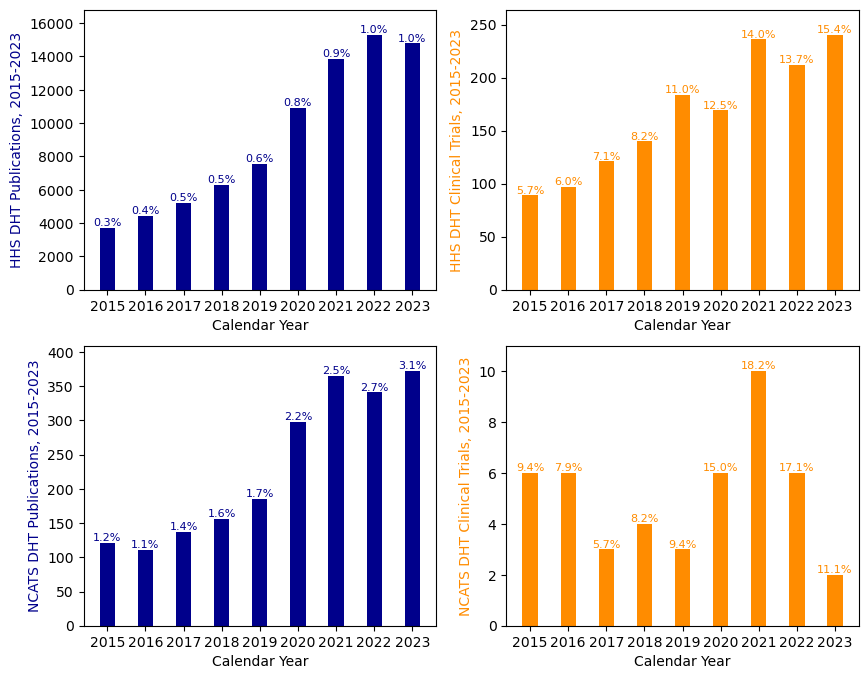

In [26]:
#barplot of all-topic DHT pubs Per Year
fig, ax = plt.subplots(2,2, figsize=(10, 8))
print(len(ax))
# Width of a bar 
width = 0.4 

ax2 = ax[0,1] #.twinx()

vals=pubsByYear['isPubDHT']
x=list(pubsByYear['Pub Year'])[:]
bar1 = ax[0,0].bar(x, vals, width = width,color='darkblue')

#change y limits to give more room:
scale=1.1
max_y_lim = max(vals)*scale
min_y_lim = 0 # min(vals)
ax[0,0].set_ylim(min_y_lim, max_y_lim);
#plt.ylim(min_y_lim, max_y_lim)

valsTrials = trialsByYear['isTrialDHT']
xTrials=list(trialsByYear['Start Year'])[:]
bar2 = ax2.bar(xTrials, valsTrials, width = width,color='darkorange')
#change y limits to give more room:
max_y_lim = max(valsTrials)*scale
min_y_lim = 0 # min(valsTrials)
#plt.ylim(min_y_lim, max_y_lim)
ax2.set_ylim(min_y_lim, max_y_lim);


#barerr=2*pubsByYear['isPubDHT']['std'] #1.96*pubsByYear['isPubDHT']['std']/np.sqrt(pubsByYear['Appl ID']['count'])
#plt.errorbar(x=x,y=vals,yerr=barerr, fmt ='o',color='darkblue')
 
#plt.xlabel("Fiscal Year")
#plt.ylabel("DHT Publications, 2015-"+ str(int(endyear)))
ax[0,0].set_ylabel("HHS DHT Publications, 2015-"+ str(int(endyear)),color='darkblue')
ax2.set_ylabel("HHS DHT Clinical Trials, 2015-"+ str(int(endyear)),color='darkorange')
ax[0,0].set_xlabel("Calendar Year")

plt.xticks(rotation=0)
plt.xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.
ax[0,0].set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.
ax2.set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.
ax2.set_xlabel("Calendar Year")

#text at top of each bar
# Add counts above the two bar graphs
fontsz=8
valsPerc=pubsByYear['percent']
for i, rect in enumerate(bar1):
    ctext=valsPerc[i]
    print(i,ctext)
    ax[0,0].text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color='darkblue', fontsize=fontsz)


#text at top of each bar
# Add counts above the two bar graphs
valsTrialsPerc=valsTrials/alltrialsByYear['isTrial']*100
for i, rect in enumerate(bar2):
    ctext=valsTrialsPerc[i]
    print(i,ctext)
    ax2.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color = 'darkorange', fontsize=fontsz)

    
#legend:
colors = {'HHS DHT Publications':'darkblue', 'HHS DHT Clinical Trials':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels)




#plot only NCATs
vals=pubsByYear['isTrDHT']
x=list(pubsByYear['Pub Year'])[:]
bar3 = ax[1,0].bar(x, vals, width = width,color='darkblue')
max_y_lim = max(vals)*scale
min_y_lim = 0 # min(vals)
ax[1,0].set_ylim(min_y_lim, max_y_lim);
ax[1,0].set_xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

valsTrials = trialsByYear['isTrTrialDHT']
xTrials=list(trialsByYear['Start Year'])[:]
ax3 = ax[1,1] #.twinx()
bar4 = ax3.bar(xTrials, valsTrials, width = width,color='darkorange')
max_y_lim = max(valsTrials)*scale
min_y_lim = 0 # min(valsTrials)
ax3.set_ylim(min_y_lim, max_y_lim);

ax[1,0].set_ylabel("NCATS DHT Publications, 2015-"+ str(int(endyear)),color='darkblue')
ax3.set_ylabel("NCATS DHT Clinical Trials, 2015-"+ str(int(endyear)),color='darkorange')
ax[1,0].set_xlabel("Calendar Year")
ax3.set_xlabel("Calendar Year")


plt.xticks(rotation=0)
plt.xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

#text at top of each bar
# Add counts above the two bar graphs
fontsz=8
valsPerc=pubsByYear['percentTR']
for i, rect in enumerate(bar3):
    ctext=valsPerc[i]
    print(i,ctext)
    ax[1,0].text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color='darkblue', fontsize=fontsz)


#text at top of each bar
# Add counts above the two bar graphs
valsTrialsPerc=valsTrials/alltrialsByYear['isTR']*100
for i, rect in enumerate(bar4):
    ctext=valsTrialsPerc[i]
    print(i,ctext)
    ax3.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom', color = 'darkorange', fontsize=fontsz)

    
#legend:
colors = {'NCATS DHT Publications':'darkblue', 'NCATS DHT Clinical Trials':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels)

print('/n==========FIGURE 4===========/n')

plt.show()
fig.figure.savefig(outpath + 'Figure4_mHealthPubsNIH_Bar withTrials_wNCATS_2by2.tiff', dpi=600) #

# Supplemental Figure 3. DHT Publications from CTSAs from 2015 – 2023 


In [27]:
df_tr_upubs = pd.read_excel(datapath + 'TR_UL1_U01-iSearch_-_Publications-export_2023-10-18-16-28-21.xlsx')

C:\Users\radmantc\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [28]:
df_tr_upubs=df_tr_upubs[(df_tr_upubs['Pub Year']>=2015) & (df_tr_upubs['Pub Year']<=2023) ]
upubsByYear = df_tr_upubs.groupby('Pub Year').agg({'PMID':'count'}).sort_index()
upubsByYear = upubsByYear.rename(columns={'PMID':'CTSA Count'})
upubsByYear

,CTSA Count
Pub Year,
2015,8384
2016,8439
2017,8015
2018,7395
2019,8637
2020,10445
2021,11566
2022,9561
2023,5650


In [29]:
df_tr_upubs_dht = pd.read_excel(datapath + 'UL1_U01_NCATS_DHT-iSearch_-_Publications-export_2024-08-04-12-09-10.xlsx')

C:\Users\radmantc\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [30]:
df_tr_upubs_dht=df_tr_upubs_dht[(df_tr_upubs_dht['Pub Year']>=2015) & (df_tr_upubs_dht['Pub Year']<=2023) ]
upubsDhtByYear = df_tr_upubs_dht.groupby('Pub Year').agg({'PMID':'count'}).sort_index()
upubsDhtByYear = upubsDhtByYear.rename(columns={'PMID':'DHT Count'})
upubsDhtByYear

,DHT Count
Pub Year,
2015,447
2016,448
2017,419
2018,439
2019,489
2020,758
2021,769
2022,606
2023,253


In [31]:
upub_counts = upubsByYear.merge(upubsDhtByYear, how='inner', on='Pub Year')
upub_counts

,CTSA Count,DHT Count
Pub Year,,
2015,8384,447
2016,8439,448
2017,8015,419
2018,7395,439
2019,8637,489
2020,10445,758
2021,11566,769
2022,9561,606
2023,5650,253


In [32]:
#get perce[ntages:
upub_counts['percentDhtPubs'] = upub_counts['DHT Count'] / upub_counts['CTSA Count'] *100

mean =  [514.2222222222222, 514.2222222222222, 514.2222222222222, 514.2222222222222, 514.2222222222222, 514.2222222222222, 514.2222222222222, 514.2222222222222, 514.2222222222222]  +/- 103.36201264035292
0 5.331583969465649
1 5.30868586325394
2 5.227698066126014
3 5.936443542934415
4 5.661688086141021
5 7.257060794638583
6 6.648798201625454
7 6.338249137119548
8 4.47787610619469


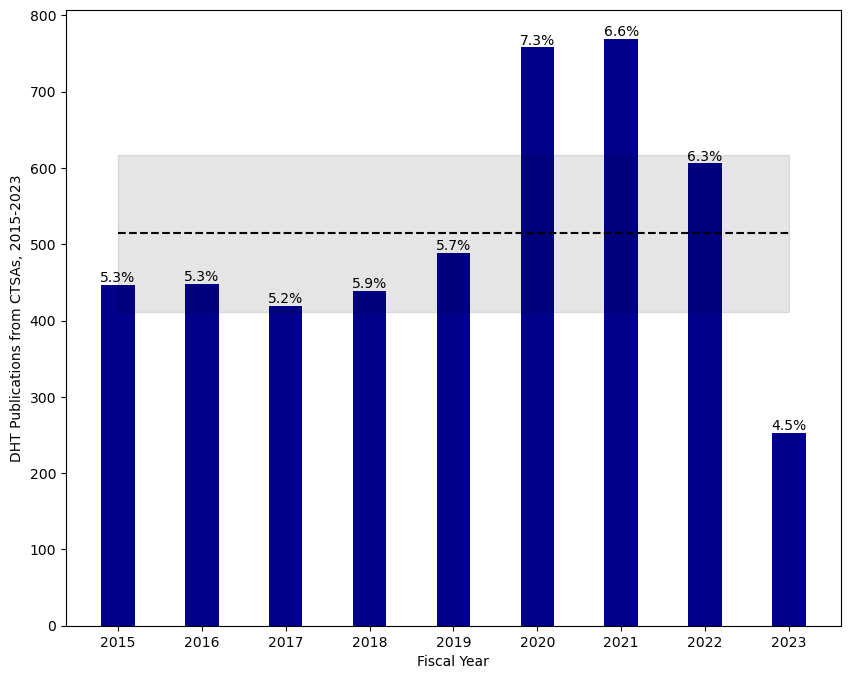

In [34]:
#barplot of DHT pubs Per Year
fig, ax = plt.subplots(1,1, figsize=(10, 8))

valsPerc=upub_counts['percentDhtPubs']
vals=upub_counts['DHT Count']
x=upub_counts.index.values.tolist()
bar1 = plt.bar(x, vals, width = 0.4,color='darkblue')

#barerr=2*pubsByYear['isPubDHT']['std'] #1.96*pubsByYear['isPubDHT']['std']/np.sqrt(pubsByYear['Appl ID']['count'])
#plt.errorbar(x=x,y=vals,yerr=barerr, fmt ='o',color='darkblue')
 
    
plt.xlabel("Fiscal Year")
plt.ylabel("DHT Publications from CTSAs, 2015-"+ str(int(endyear)))

#dashed line showing grand mean:
grandmean=[np.mean(vals)]*len(vals)
plt.plot(x, grandmean,color='k',linestyle='--')
ci = 1.96 * np.std(vals)/np.sqrt(len(vals))
plt.fill_between(x, (grandmean-ci), (grandmean+ci), color='k', alpha=.1)
print('mean = ', grandmean, ' +/-', ci)

plt.xticks(rotation=0)
plt.xticks(x, x, rotation=0) #The first argument gives the locations to put the ticks (df.index here is equivalent to np.arange(len(df)), but if your index isn't evenly spaced use the arange). The second argument gives the tick labels.

#text at top of each bar
# Add counts above the two bar graphs
for i, rect in enumerate(bar1):
    ctext=valsPerc[x[i]]
    print(i,ctext)
    plt.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), f'{ctext:.1f}%', ha='center', va='bottom')


plt.show()
fig.figure.savefig(outpath + 'SuppFig3_mHealthPubsAllCTSA_Bar.tiff', dpi=600) #